In [261]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import joblib

In [262]:
# Load the dataset
df = pd.read_csv('copra_drying_dataset_with_oil_yield_3.csv')

In [263]:
df.head(2)

,Maturity Stage (Days),Initial Moisture Level (%),Temperature (°C),Humidity (%),Drying Time (hrs),Estimated Oil Yield (kg)
0,120,30.590581,25.118079,42.08281,11.50,4.70
1,117,20.593976,26.539614,69.97970,8.08,4.76


In [264]:
X = df[['Initial Moisture Level (%)', 'Temperature (°C)', 'Humidity (%)']]
y = df['Drying Time (hrs)']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
# Define accuracy calculation function
def calculate_accuracy(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    accuracy = 100 * (1 - rmse / np.mean(y_true))
    return max(0, accuracy)

In [267]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
dt_accuracy = calculate_accuracy(y_test, dt_y_pred)

In [268]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_accuracy = calculate_accuracy(y_test, rf_y_pred)

In [269]:
# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_accuracy = calculate_accuracy(y_test, gb_y_pred)

In [270]:
# Determine the best model based on weighted scores
alpha = 0.7  # Weight for R²
beta = 0.3   # Weight for MAE
dt_score = alpha * dt_r2 - beta * dt_mae
rf_score = alpha * rf_r2 - beta * rf_mae
gb_score = alpha * gb_r2 - beta * gb_mae

# Compare all models based on the weighted scores
if gb_score > rf_score and gb_score > dt_score:
    best_model = gb_model
    best_model_name = "Gradient Boosting"
    reason = f"Weighted Score: {gb_score:.2f} (Higher than Decision Tree and Random Forest)"
elif rf_score > dt_score:
    best_model = rf_model
    best_model_name = "Random Forest"
    reason = f"Weighted Score: {rf_score:.2f} (Higher than Decision Tree)"
else:
    best_model = dt_model
    best_model_name = "Decision Tree"
    reason = f"Weighted Score: {dt_score:.2f} (Higher than Random Forest)"


In [271]:
# Print model performance for all models
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R²: {rf_r2}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")
print(f"")

print(f"Decision Tree MAE: {dt_mae}")
print(f"Decision Tree R²: {dt_r2}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")
print(f"")
print(f"Gradient Boosting MAE: {gb_mae}")
print(f"Gradient Boosting R²: {gb_r2}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}%")
print(f"")

print(f"Best Model: {best_model_name}")
#print(f"Reason: {reason}")

Random Forest MAE: 1.098042285714286
Random Forest R²: 0.9604582730443909
Random Forest Accuracy: 91.95%

Decision Tree MAE: 1.5077428571428573
Decision Tree R²: 0.9245675149458584
Decision Tree Accuracy: 88.88%

Gradient Boosting MAE: 1.0551234193633598
Gradient Boosting R²: 0.9643488441038338
Gradient Boosting Accuracy: 92.36%

Best Model: Gradient Boosting


In [272]:
# Save the best model
joblib.dump(best_model, 'best_drying_time_model.pkl')


['best_drying_time_model.pkl']

In [290]:
# Load the best model for prediction
loaded_model = joblib.load('best_drying_time_model.pkl')

# Example new input data (as a DataFrame)
new_data = pd.DataFrame({
    'Initial Moisture Level (%)': [50],
    'Temperature (°C)': [25],
    'Humidity (%)': [50]
})

# Predict the drying time for new data
predicted_drying_time = loaded_model.predict(new_data)
print("Predicted Drying Time (hrs):", round(predicted_drying_time[0], 2))


Predicted Drying Time (hrs): 24.83


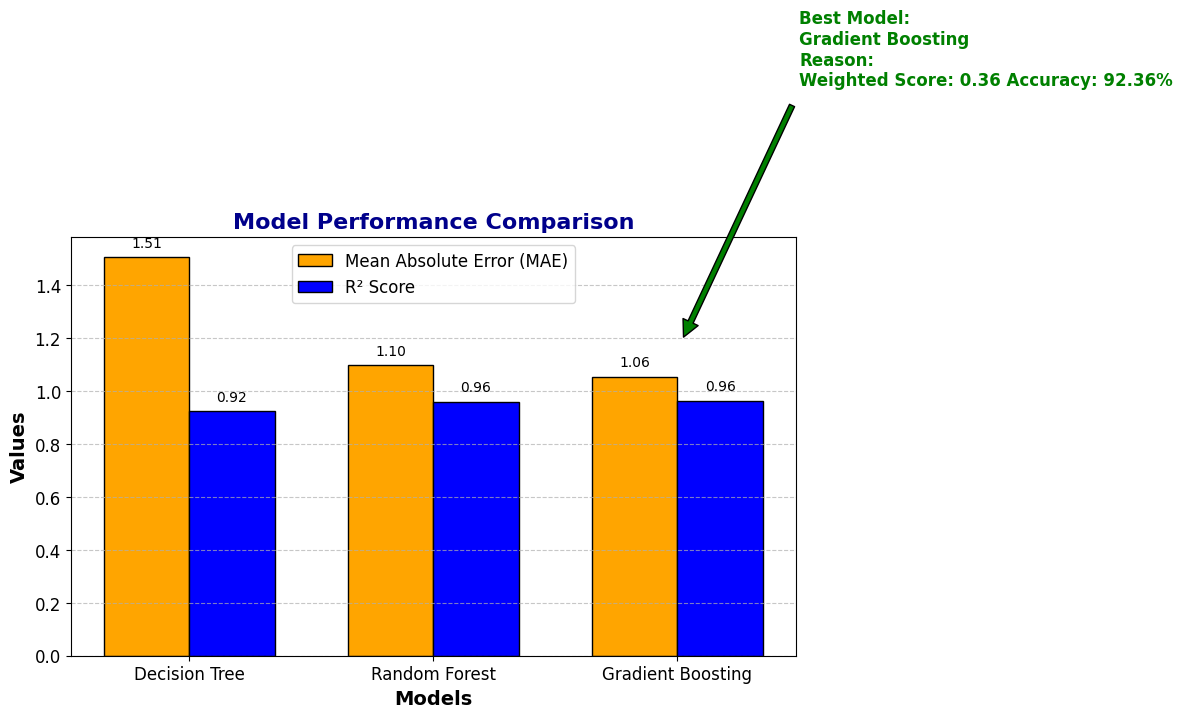

In [274]:
import matplotlib.pyplot as plt
# Determine the best model
if gb_score > rf_score and gb_score > dt_score:
    best_model = "Gradient Boosting"
    reason = (
        f"Weighted Score: {gb_score:.2f} "
        f"Accuracy: {gb_accuracy:.2f}% "
    )
elif rf_score > dt_score:
    best_model = "Random Forest"
    reason = (
        f"Weighted Score: {rf_score:.2f} (Higher than Decision Tree),\n "
        f"Accuracy: {rf_accuracy:.2f}% (Higher than Decision Tree: {dt_accuracy:.2f}%)"
    )
else:
    best_model = "Decision Tree"
    reason = (
        f"Weighted Score: {dt_score:.2f}\n (Higher than Random Forest), \n"
        f"Accuracy: {dt_accuracy:.2f}%\ (Higher than Random Forest: {rf_accuracy:.2f}%)"
    )

# Data for the models
labels = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
mae_values = [dt_mae, rf_mae, gb_mae]
r2_values = [dt_r2, rf_r2, gb_r2]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

# Plot the graph
fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(x - width/2, mae_values, width, label='Mean Absolute Error (MAE)', color='orange', edgecolor='black')
bar2 = ax.bar(x + width/2, r2_values, width, label='R² Score', color='blue', edgecolor='black')

# Add labels, title, and grid
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Values', fontsize=14, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold', color='darkblue')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=10, color='black')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=10, color='black')

# Highlight the best model with an arrow and text
best_model_index = labels.index(best_model)
best_model_x = x[best_model_index]  # X-coordinate for the best model
best_model_y = max(mae_values[best_model_index], r2_values[best_model_index]) + 0.1  # Y-coordinate above the highest bar

ax.annotate(f"Best Model:\n{best_model}\nReason:\n{reason}", 
            xy=(best_model_x, best_model_y),
            xytext=(best_model_x + 0.5, best_model_y + 1),
            fontsize=12, color='green', fontweight='bold',
            arrowprops=dict(facecolor='green', shrink=0.05, edgecolor='black'))

# Add additional styling
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

For Oil yeld

In [275]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [276]:
#df.head(2)

In [277]:
X = df[['Initial Moisture Level (%)', 'Temperature (°C)', 'Humidity (%)','Drying Time (hrs)']]
y = df['Estimated Oil Yield (kg)']

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')

In [280]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [281]:
# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

In [282]:
# Train the Support Vector Regression model
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)

In [283]:
# Function to calculate accuracy (RMSE and Accuracy)
def calculate_accuracy(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    accuracy = 100 * (1 - rmse / np.mean(y_true))
    return max(0, accuracy)

In [284]:
# Evaluate the models
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_accuracy = calculate_accuracy(y_test, rf_y_pred)

gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_accuracy = calculate_accuracy(y_test, gb_y_pred)

svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_accuracy = calculate_accuracy(y_test, svr_y_pred)

In [285]:
# Select the best model based on the R² score
if gb_r2 > rf_r2 and gb_r2 > svr_r2:
    best_model = gb_model
    best_model_name = "Gradient Boosting Regressor"
    best_mae = gb_mae
    best_r2 = gb_r2
    best_accuracy = gb_accuracy
elif rf_r2 > gb_r2 and rf_r2 > svr_r2:
    best_model = rf_model
    best_model_name = "Random Forest Regressor"
    best_mae = rf_mae
    best_r2 = rf_r2
    best_accuracy = rf_accuracy
else:
    best_model = svr_model
    best_model_name = "Support Vector Regression"
    best_mae = svr_mae
    best_r2 = svr_r2
    best_accuracy = svr_accuracy

In [286]:
# Print the model evaluation results with accuracy
print("Random Forest \nMAE:", rf_mae, "\nR² Score:", rf_r2, "\nAccuracy:", rf_accuracy, "%")
print("\nGradient Boosting \nMAE:", gb_mae, "\nR² Score:", gb_r2, "\nAccuracy:", gb_accuracy, "%")
print("\nSupport Vector Regression \nMAE:", svr_mae, "\nR² Score:", svr_r2, "\nAccuracy:", svr_accuracy, "%")


# Print the best model
print(f"\nBest Model: {best_model_name}")
print(f"Reason: Higher R² Score ({best_r2:.2f}) with MAE of {best_mae:.2f} and Accuracy of {best_accuracy:.2f}%")


Random Forest 
MAE: 0.2209191428571428 
R² Score: 0.1736631385391989 
Accuracy: 94.71043839558251 %

Gradient Boosting 
MAE: 0.23039459313160535 
R² Score: 0.14392679811116416 
Accuracy: 94.61610517298838 %

Support Vector Regression 
MAE: 0.19271794830054922 
R² Score: 0.3456972987903033 
Accuracy: 95.29314875697088 %

Best Model: Support Vector Regression
Reason: Higher R² Score (0.35) with MAE of 0.19 and Accuracy of 95.29%


In [287]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_oil_yield_predictor.pkl')


['best_oil_yield_predictor.pkl']

In [292]:
# Load the best model
loaded_model = joblib.load('best_oil_yield_predictor.pkl')

# Example new input data (as a DataFrame)
new_data = pd.DataFrame({
    'Initial Moisture Level (%)': [60],
    'Temperature (°C)': [30],
    'Humidity (%)': [50],
    'Drying Time (hrs)':[26]
})

# Predict the oil yield for new data using the best model
predicted_oil_yield = loaded_model.predict(new_data)
print("Predicted Oil Yield (kg):", predicted_oil_yield[0])


Predicted Oil Yield (kg): 4.920657527883881
